## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [79]:
from sklearn.datasets import load_boston

In [80]:
data = load_boston()

In [81]:
X, Y = data['data'], data['target']

In [82]:
# X[:, 5]

In [83]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [84]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [85]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [86]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [87]:
import random

In [88]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is -86.24533369178393, best_b is 97.47395405497258, loss is 222685.77762429838
when time is 50, best_k is -53.15715495712492, best_b is -53.07445274712201, loss is 169791.54095768862
when time is 100, best_k is -32.22287071791648, best_b is -32.17094686401081, loss is 67043.38328375458
when time is 150, best_k is -19.070693690515487, best_b is -19.0381066519209, loss is 26492.121848678977
when time is 200, best_k is -10.807704682459722, best_b is -10.787266194788177, loss is 10488.958191576288
when time is 250, best_k is -5.61639778284885, best_b is -5.603591745875906, loss is 4174.13213767116
when time is 300, best_k is -2.354906414571145, best_b is -2.3468955423907425, loss is 1682.7302858226294
when time is 350, best_k is -0.30584128491230433, best_b is -0.3008430237916554, loss is 700.0559311689634
when time is 400, best_k is 0.9815047269218431, best_b is 0.9846102844983997, loss is 312.6291269938975
when time is 450, best_k is 1.790292954390831, best_b is 1.

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

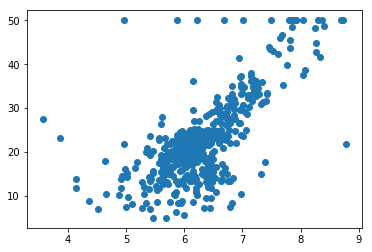

In [91]:
draw_rm_price()

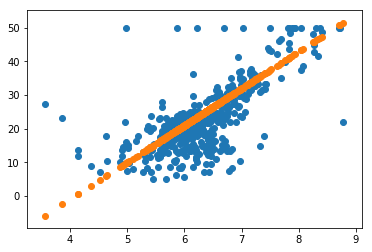

In [92]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [93]:
from collections import defaultdict

In [94]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [95]:
price = defaultdict(int)

In [96]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [97]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [98]:
def example(f, arg):
    return f(arg)

In [99]:
def add_ten(num):
    return num + 10

In [100]:
def mul_ten(num):
    return num * 10 

In [101]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [102]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [103]:
def some_funcion_1(): 
    print('I am function 1')

In [104]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [105]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [106]:
from functools import wraps

In [107]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [108]:
def add_ten(n): return n + 10

In [109]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [110]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [111]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [112]:
add_twenty(9)

29

#### ③ Cutting Problem

In [113]:
solution = {}

In [114]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [115]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [116]:
r(10)

30

In [117]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [118]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [119]:
#r(105)

In [120]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [121]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [122]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [123]:
#r(20)

In [124]:
#r(105)

In [125]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [126]:
r(105)

332

In [127]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [128]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r>

In [129]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [130]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [131]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [132]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
    
    return 1 / n * gradient

In [133]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
    
    return 1 / n * gradient

In [134]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.1

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)    
    
    if current_loss < min_loss:
        
        min_loss = current_loss
        
        print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k - (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k - (-1 * b_gradient )* rate  # b与偏导方向相反

when time is 0, best_k is -49.41262029208473, best_b is -48.15737439821248, loss is 381.23043337911474
when time is 1, best_k is -48.78415685334955, best_b is -48.68415685334955, loss is 377.8075528959835
when time is 2, best_k is -48.15569341461437, best_b is -48.05569341461437, loss is 373.22942651897984
when time is 3, best_k is -47.52722997587919, best_b is -47.427229975879186, loss is 368.65130014197644
when time is 4, best_k is -46.898766537144006, best_b is -46.798766537144004, loss is 364.0731737649728
when time is 5, best_k is -46.270303098408824, best_b is -46.17030309840882, loss is 359.49504738796924
when time is 6, best_k is -45.64183965967364, best_b is -45.54183965967364, loss is 354.91692101096555
when time is 7, best_k is -45.01337622093846, best_b is -44.91337622093846, loss is 350.3387946339618
when time is 8, best_k is -44.38491278220328, best_b is -44.28491278220328, loss is 345.7606682569581
when time is 9, best_k is -43.7564493434681, best_b is -43.6564493434681,

when time is 85, best_k is 2.9602965063343585, best_b is 2.9828261506031333, loss is 5.571019867853936
when time is 86, best_k is 3.006033858113015, best_b is 3.0088006565319874, loss is 5.559273354331015
when time is 87, best_k is 3.012947889733568, best_b is 3.0093905774806036, loss is 5.558816301328697
when time is 89, best_k is 3.0147281268877184, best_b is 3.0091945300497738, loss is 5.558726831371547


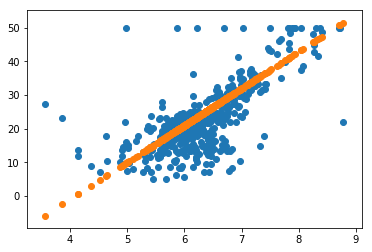

In [135]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [136]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [137]:
solution = dict()

In [138]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = (string1[:-1], string2)
    elif operation.startswith("Add"):
        solution[(string1, string2)] = (string1, string2[:-1])
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = (string1[:-1], string2[:-1])
    else:
         solution[(string1, string2)] = (string1[:-1], string2[:-1])
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [139]:
edit_distance('ABCDE', 'ABCCEF')

2

In [140]:
solution

{('A', 'A'): ('', ''),
 ('A', 'AB'): ('A', 'A'),
 ('A', 'ABC'): ('A', 'AB'),
 ('A', 'ABCC'): ('A', 'ABC'),
 ('A', 'ABCCE'): ('A', 'ABCC'),
 ('A', 'ABCCEF'): ('A', 'ABCCE'),
 ('AB', 'A'): ('A', 'A'),
 ('AB', 'AB'): ('A', 'A'),
 ('AB', 'ABC'): ('AB', 'AB'),
 ('AB', 'ABCC'): ('AB', 'ABC'),
 ('AB', 'ABCCE'): ('AB', 'ABCC'),
 ('AB', 'ABCCEF'): ('AB', 'ABCCE'),
 ('ABC', 'A'): ('AB', 'A'),
 ('ABC', 'AB'): ('AB', 'AB'),
 ('ABC', 'ABC'): ('AB', 'AB'),
 ('ABC', 'ABCC'): ('ABC', 'ABC'),
 ('ABC', 'ABCCE'): ('ABC', 'ABCC'),
 ('ABC', 'ABCCEF'): ('ABC', 'ABCCE'),
 ('ABCD', 'A'): ('ABC', 'A'),
 ('ABCD', 'AB'): ('ABC', 'AB'),
 ('ABCD', 'ABC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCD', 'ABCCEF'): ('ABCD', 'ABCCE'),
 ('ABCDE', 'A'): ('ABCD', 'A'),
 ('ABCDE', 'AB'): ('ABCD', 'AB'),
 ('ABCDE', 'ABC'): ('ABCD', 'ABC'),
 ('ABCDE', 'ABCC'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCEF'): ('ABCDE', 'ABCCE')}

In [141]:
res = []
def parse_solution(string1 ,string2, solution):
    res.append((string1,string2))
    left_string1, right_string2 = solution[(string1, string2)]
    
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [142]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [143]:
res

[('ABCDE', 'ABCCEF'),
 ('ABCDE', 'ABCCE'),
 ('ABCD', 'ABCC'),
 ('ABC', 'ABC'),
 ('AB', 'AB'),
 ('A', 'A')]

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [144]:
import random
import matplotlib.pylab as plt

In [145]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

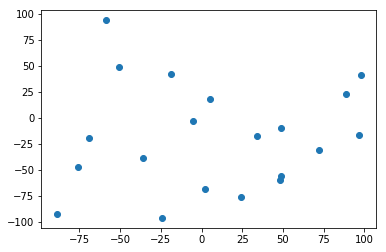

In [146]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [147]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [148]:
import matplotlib.pyplot as plt

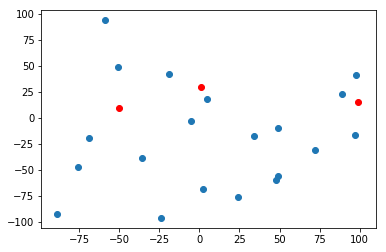

In [149]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro